<a href="https://colab.research.google.com/github/JigneshPurabiya26/HealthInsurance_Cost-Predition/blob/main/Miniproject_HealthInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health_Insurance_Cost Prediction


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the dependencies

In [ ]:
import pandas as pd #used for data analysis
import numpy as np #numpy used for doing the mathematical operations
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #seaborn used for data visualization and also contains some inbuilt datasets
from sklearn.model_selection import train_test_split #used for dividing the data into the train and test data
from sklearn.linear_model import LinearRegression # Imported the model for predicting
from sklearn import metrics 

### Data collection 

In [ ]:
#loading the data from csv file to pandas dataframe
insurance_dataset=pd.read_csv("/content/insurance.csv")

In [ ]:
#first five rows of the datset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#this command gives you the number of tuples and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#this command gives you the complete information about the dataset i.e the datatypes in the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorical Features

*   Sex
*   Smoker

*   Region
### Finding the missing values




In [ ]:
#Checking for the missing values
insurance_dataset.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
insurance_dataset.isnull().sum() #gives the total sum of missing values for an object

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [ ]:
#Statistical analysis for the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


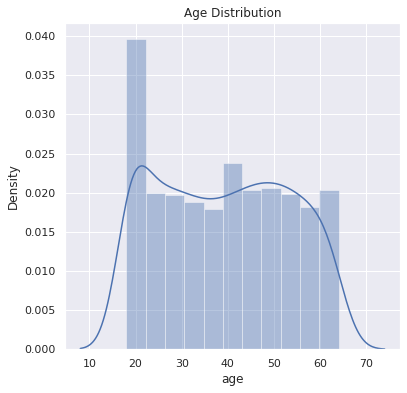

In [ ]:
#distribution of age value
sns.set() #set function will help you give grids in the plot
plt.figure(figsize=(6,6)) #the matplotlib library used for giving the size to our plot
sns.distplot(insurance_dataset['age']) #Seaborn distplot tells all the values in the dataset are distributed and 
# lets you show a histogram with a line on it
#enter the object name as it is because it is case sensitive
plt.title('Age Distribution') #title for the plot
plt.show() #will display the plot


#THE GRAPH SHOWS THE DENSITY OF THE PEOPLE BASED ON AGE IN THE DATASET
#i.e IN OUR DATASET MOST NUMBER OF PEOPLE ARE AGED 20


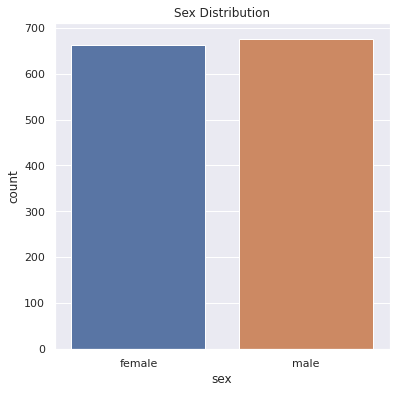

In [ ]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset) #didn't use the distplot because sex is a categorical 
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts() #value_counts() function gave us the information about the total number of males and females in the dataset.

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

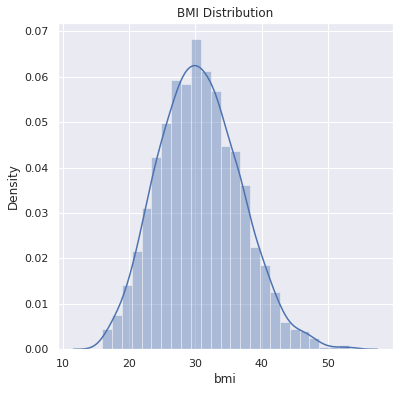

In [ ]:
plt.figure(figsize=(6,6)) #plotting the distribution graph for BMI
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
#Ideal BMI range for a person --> (18.5 - 24.9)
#It is calucated using the height and weight of a person

Text(0.5, 1.0, 'Children')

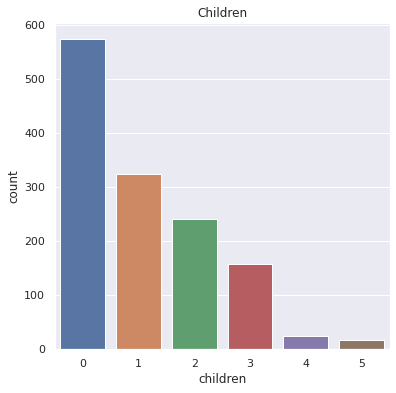

In [ ]:
#plotting the graph to show the distribution of children 
#the graph below represents that there are more number of people who do not have any children
plt.figure(figsize=(6,6)) 
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Smokers')

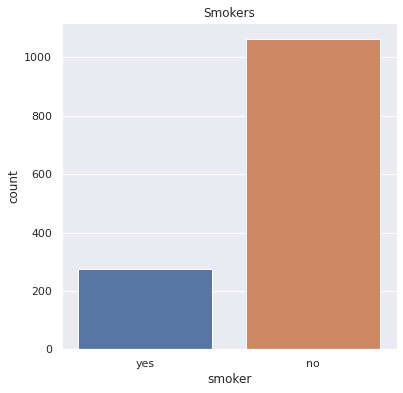

In [ ]:
#Smoker columns
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smokers')

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Region')

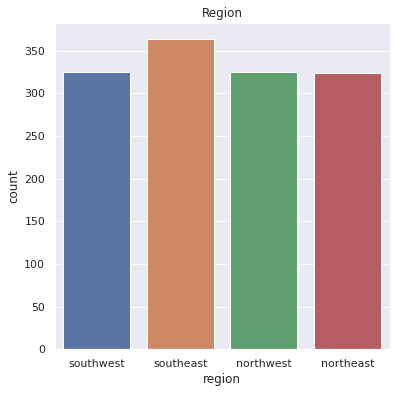

In [ ]:
#The plot below represents the distribution of region
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Charges')

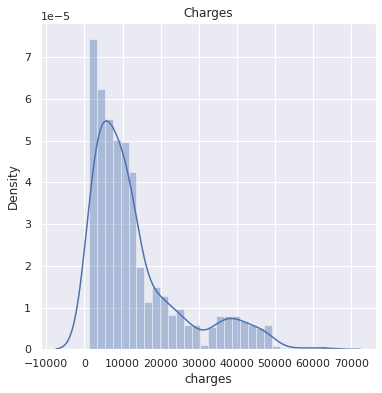

In [ ]:
#distribution of charges 
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges')

###Data Preprocessing

####Encoding the categorical features

In [ ]:
# Since our machine learning model cannot understand the categorical values 
# we need to give our text data a numerical lable

# Here we will encode the sex columns values
insurance_dataset.replace({'sex': {'male':0 , 'female':1}}, inplace=True)

#encoding the smoker values
insurance_dataset.replace({'smoker': {'yes':0 , 'no':1}}, inplace=True)

#encoding the region values
insurance_dataset.replace({'region': {'southeast':0 , 'southwest':1, 'northeast':2, 'northwest':3}} , inplace=True) 

#the inplace=True replaces the values from the original dataset instead for a particular instance

####Splitting the features and target variables

In [ ]:
X = insurance_dataset.drop(columns="charges",axis=1) #Here we are dropping the target variable i.e charges from the table and storing the rest of the features in X 
Y = insurance_dataset['charges'] #Here we are assigning the target variable to Y

In [ ]:
print(X) #Contains all the columns except for charges

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y) #contains charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


####Splitting the data into Training and Testing Data 

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2) 

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


##Model Training

####Random Forest Regression

In [ ]:
#Loading the linear Regression model
# regressor = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 42)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

####Model Evaluation

In [ ]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#R_squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value : ',r2_train)

R Squared value :  0.9772612152330278


In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
#R_squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value : ',r2_test)

R Squared value :  0.8379198591254433


##Building a predictive system

In [ ]:
input_data = (31,1,25.74,0,1,0)

#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array because our training data predicted on the basis of all the tuples i.e 1070
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = regressor.predict(input_data_reshaped)
print('The insurance cost is USD',prediction[0])

The insurance cost is USD 3729.6420035000065


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Predicted')

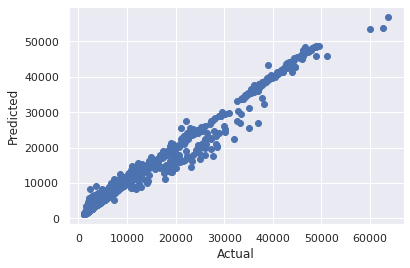

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual")
plt.ylabel("Predicted")

##Saving the trained model

In [ ]:
import pickle #importing the pickle library for saving our trained model

In [ ]:
filename = 'trained_model1.sav' #saving our model into a variable and giving a name to it
pickle.dump(regressor,open(filename,'wb')) #pickle.dump() function of the pickle library is used to save our model
#in the above step we have saved our regressor model into the variable filename 
#open means we have opened the filename
#and wb means write binary means we are writing the regressor in a binary format

####Loading the saved model

In [ ]:
loaded_model = pickle.load(open('trained_model1.sav','rb')) #pickle.load() function of the pickle library is used to load the model
#in the above loc rb means reading the binary code 

In [ ]:
input_data = (31,1,25.74,0,1,0)

#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array because our training data predicted on the basis of all the tuples i.e 1070
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print('The insurance cost is USD',prediction[0])

The insurance cost is USD 3729.6420035000065


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
